In this analysis, I would like to determine factors that make the laptop prices differ. The relationship of observations was independent and we assumed that the relationship was linear. So, we would like to fit the data with linear regression.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
# Import laptop data
data = pd.read_csv("laptopData.csv")
data.head()

,Unnamed: 0,sale,price,ghz,ram,hd,ssd,BIN
0,1,SOLD,404.99,2.7,8.0,NaN,SSD,False
1,2,SOLD,355.00,2.5,8.0,128.0,SSD,False
2,3,SOLD,449.99,2.6,4.0,128.0,No,True
3,4,NOT SOLD,499.99,2.5,4.0,320.0,No,True
4,5,NOT SOLD,199.99,NaN,NaN,NaN,No,True


In [80]:
data.shape

(220, 8)

In [81]:
# Drop the first columns (running number)
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [82]:
# Data Type of each column
data.dtypes

sale      object
price    float64
ghz      float64
ram      float64
hd       float64
ssd       object
BIN         bool
dtype: object

## Distribution of each variable
Draw histogram of each variable and determine the distribution

In [83]:
def draw_hist(df, variables, n_rows, n_cols):
    """
    Function: draw histogram of all variables
              in data Frame
              
    Parameters
    ----------
    df: DataFrame data
    variables: list variables in the plot
    n_rows: int number of rows that will be shown
    n_cols: int number of columns that will be shown
    
    Return
    ---------
    Plots from listed variables
    """
    fig = plt.figure()
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        if df[var].dtypes == np.float64:
            sns.histplot(data = df, x = var, ax = ax)
        else:
            sns.countplot(data = df, x = var, ax = ax)
        ax.set_title(var)
    plt.show()

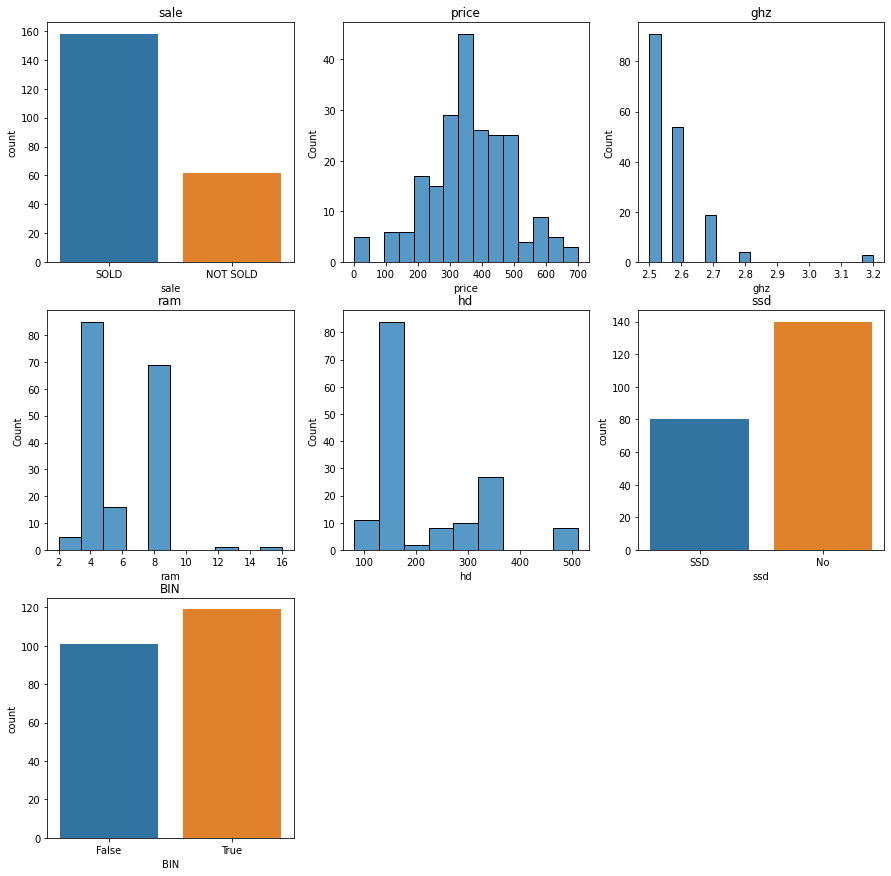

In [84]:
plt.rcParams['figure.figsize'] = [15,15]
draw_hist(data, data.columns, 3, 3)

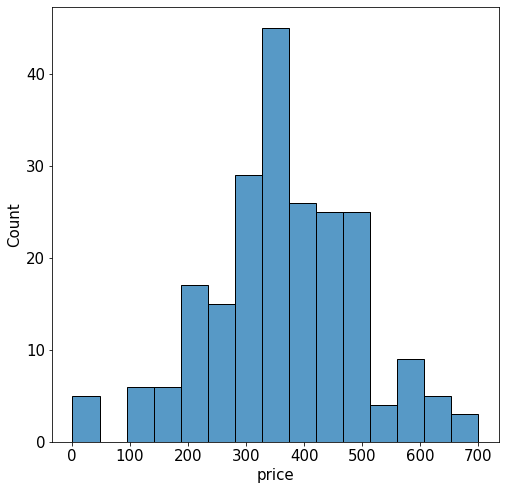

In [124]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 15})
sns.histplot(data.price)
plt.savefig('price_hist.png')
plt.show()

According to the histogram, we have captured some point
- There are some computer that the price are too small.
- Most computers contain 2.5 ghz of speed of processor.
- Most of computers in this data set contained 4 GB of ram.
- Amount of hard drive space between 100 and 200 are the most popular zone.
- There are less solid state hard drive than magnetic hard drive.
- Most of listed price are not for auction.

## Scatter plot or box plot against "price"

In [184]:
def draw_outcome_plots(df, var, outcome, n_rows, n_cols, size = [15,10]):
    """
    Function: Draw scatter plot or box plot
              of outcome against other variables
    
    Parameters
    ----------
    df: DataFrame data that we will draw
    var: List variables that would like to plot
    outcome: String outcome of interest
    n_rows: int number of rows that will be shown
    n_cols: int number of columns that will be shown
    
    Return
    ----------
    Plot of outcome against listed variables
    """
    
    fig = plt.figure(figsize=(size[0],size[1]))
#     var = df.columns.drop(outcome)
    for i, var in enumerate(var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        if len(df[var].unique()) > 5:
            sns.scatterplot(x = var, y = outcome, data = df, ax = ax)
        else:
            sns.boxplot(x = var, y = outcome, data = df, ax = ax)
        ax.set_title(var)
    fig.suptitle('Scatter and Box Plots by ' + outcome)
    return fig

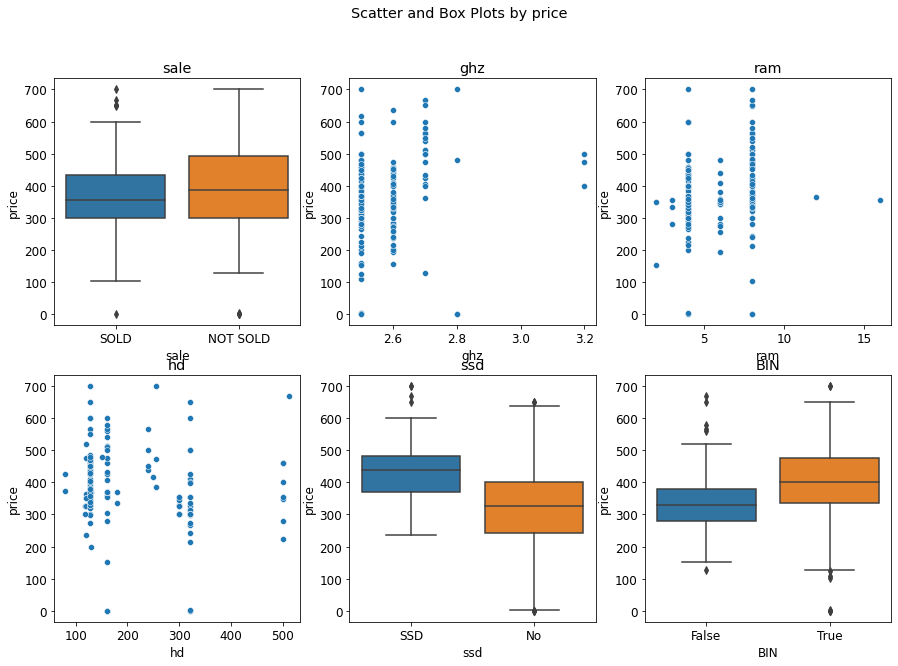

In [187]:
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams.update({'font.size': 12})
var = data.columns.drop('price')
fig1 = draw_outcome_plots(data, var, 'price', 2,3)

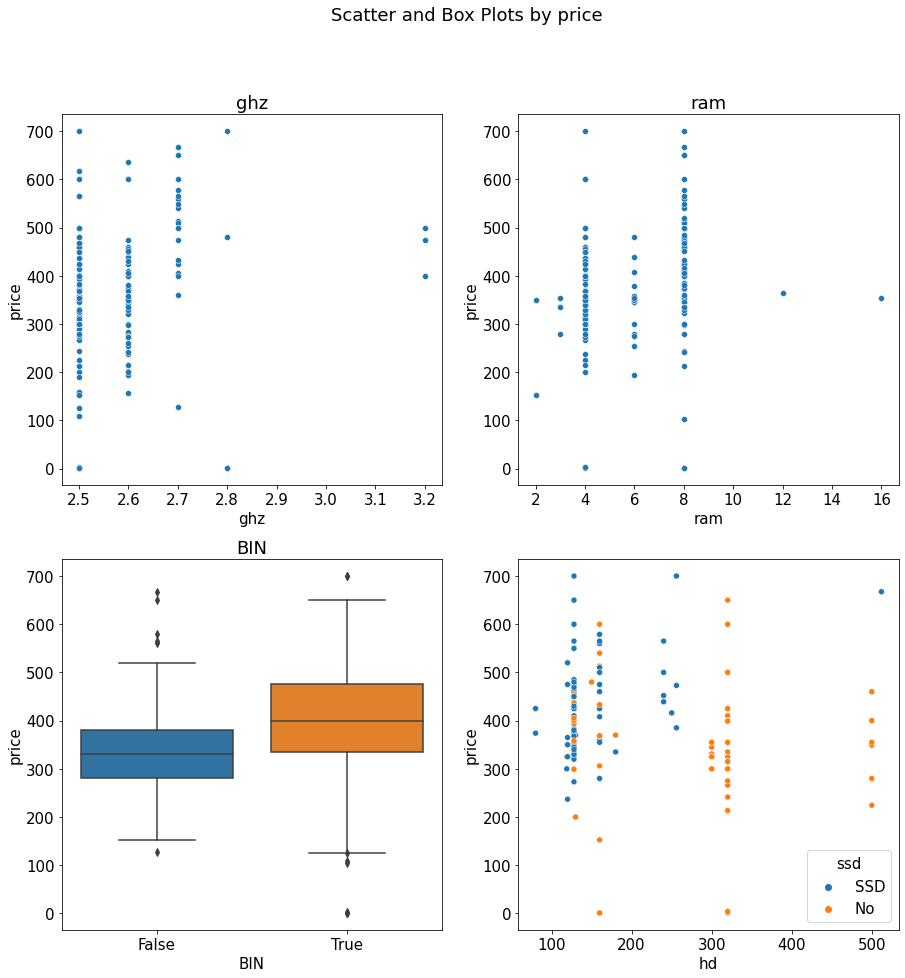

In [215]:
plt.rcParams.update({'font.size': 15})
fig = draw_outcome_plots(data,
        ['ghz','ram','BIN'], 'price', 2,2, size = [15,15])
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(data = data, x = 'hd',
        y = 'price', hue = 'ssd', ax = ax)
fig.savefig('scatter_plot.png')

- We cannot conclude the relationship from the plot for speed of processor or amount of hard drive space.
- But we can see that the higher median of ram can cause higher price.
- From box plot of hard drive, hard drive with solid state tend to be more expensive than magnetic one.
- Lastly, the price of computers with buy it now option are likely to be higher than auction option.

In [87]:
data.corr()

,price,ghz,ram,hd,BIN
price,1.000000,0.200020,0.210697,-0.158990,0.173600
ghz,0.200020,1.000000,0.341011,-0.102657,-0.007366
ram,0.210697,0.341011,1.000000,-0.041576,-0.018053
hd,-0.158990,-0.102657,-0.041576,1.000000,-0.160717
BIN,0.173600,-0.007366,-0.018053,-0.160717,1.000000


In [88]:
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
price,220.0,364.16,132.30,1.0,299.98,357.5,449.99,699.99
ghz,171.0,2.57,0.11,2.5,2.50,2.5,2.60,3.20
ram,177.0,5.81,2.14,2.0,4.00,4.0,8.00,16.00
hd,150.0,205.16,105.68,80.0,128.00,160.0,300.00,512.00


In [118]:
data.mode()

,sale,price,ghz,ram,hd,ssd,BIN
0,SOLD,300.0,2.5,4.0,128.0,No,True


In [89]:
def get_categorical_percentages(df):
    cat_df = df.select_dtypes(exclude=np.number)
    for var in cat_df.columns:
        perc = df[var].value_counts() / df[var].count()
        print(var)
        print(perc)

In [90]:
get_categorical_percentages(data)

sale
SOLD        0.718182
NOT SOLD    0.281818
Name: sale, dtype: float64
ssd
No     0.636364
SSD    0.363636
Name: ssd, dtype: float64
BIN
True     0.540909
False    0.459091
Name: BIN, dtype: float64


## Data Cleaning

In [214]:
# % of missing data at least one variable
missing_value = data.isna()\
    .sum(axis = 1).value_counts()/data.shape[0]
1- missing_value[0]

0.4181818181818182

In [91]:
# % of missing data in each variable
round(data.isna().sum()/data.shape[0],4)

sale     0.0000
price    0.0000
ghz      0.2227
ram      0.1955
hd       0.3182
ssd      0.0000
BIN      0.0000
dtype: float64

In [92]:
data[data.price <= 100]

,sale,price,ghz,ram,hd,ssd,BIN
72,NOT SOLD,1.0,2.5,4.0,320.0,No,True
73,NOT SOLD,4.0,2.5,4.0,320.0,No,True
83,NOT SOLD,1.0,2.8,8.0,160.0,No,True
86,NOT SOLD,1.0,2.8,8.0,160.0,No,True
202,SOLD,1.0,2.5,NaN,NaN,No,True


1. There are 4 computers that the price are too low (could be outliers). I don't include these data in my analysis.

In [143]:
# remove price <= 10
data_c = data.copy()
data_c = data[~data.index.isin(data[data.price <= 10].index)]

2. There are some NAs values in ghz, ram, and hd. I will remove data which appear 3 NAs for at the same time.

In [144]:
data_all_na = data_c[(data_c.ghz.isna()) &\
                     (data_c.hd.isna()) &\
                     (data_c.ram.isna())]
data_all_na.shape

(19, 7)

In [145]:
# % of missing all data at a time
round(data_all_na.shape[0]/data.shape[0], 4)

0.0864

There are 19 data points that have NAs for ghz, hd, and ram in the same time.

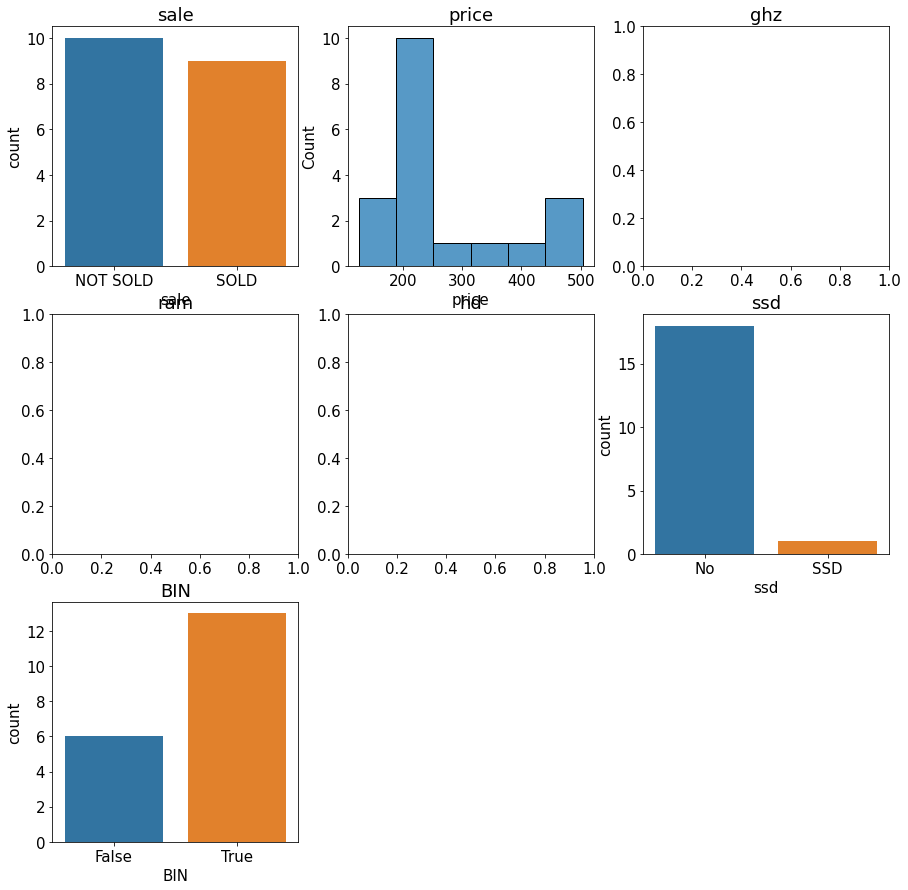

In [146]:
plt.rcParams['figure.figsize'] = [15,15]
draw_hist(data_all_na,data_all_na.columns, 3,3)

Draw prices against sale, ssd and BIN to see the trend.

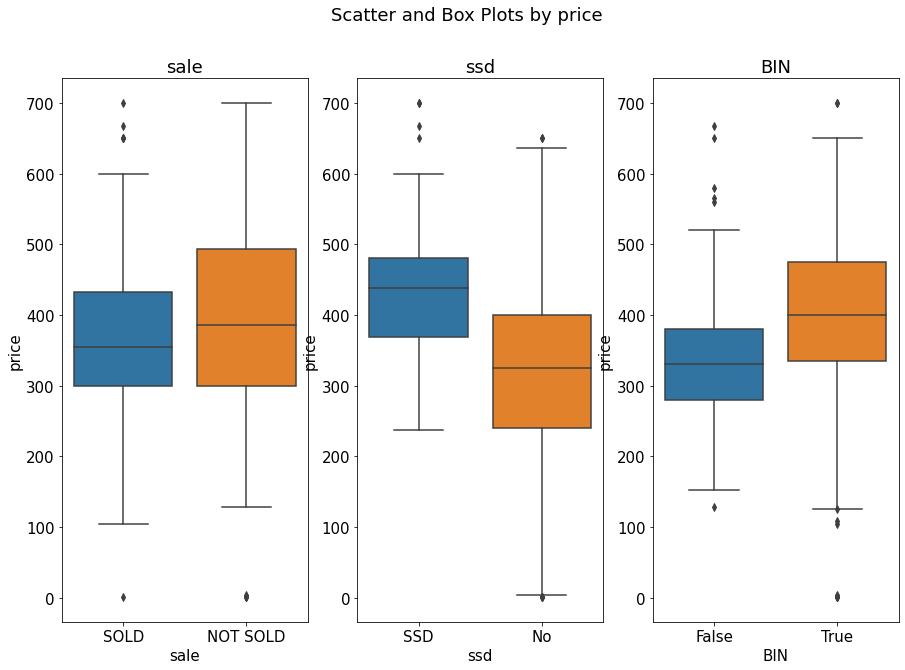

In [147]:
plt.rcParams['figure.figsize'] = [5,15]
var = ['sale', 'ssd', 'BIN']
draw_outcome_plots(data, var, 'price', 1,3)

We can see that the median of price with solid state hard drive is higher than magnetic hard drive. While the price with auction option is lower than that in buy it now.

In [148]:
# Remove price < 10
data_c = data_c[~data_c.index.\
                isin(data_all_na.index)]

In [149]:
data_c.shape

(196, 7)

In [150]:
data.isna().sum()

sale      0
price     0
ghz      49
ram      43
hd       70
ssd       0
BIN       0
dtype: int64

3. Use mode to impute missing data

In [152]:
data_c = data_c.fillna(data_c.mode().iloc[0])

4. Remove sale from data list because the median of both levels are not different and do not imply the price.

In [153]:
data_c = data_c.drop(['sale'], axis = 1)

5. Convert string into number

In [154]:
data_c = pd.get_dummies(data_c).drop(columns = ['ssd_No'], axis = 1)
data_c['BIN'] = data_c['BIN'].astype(int)

In [155]:
data_c.head()

,price,ghz,ram,hd,BIN,ssd_SSD
0,404.99,2.7,8.0,128.0,0,1
1,355.00,2.5,8.0,128.0,0,1
2,449.99,2.6,4.0,128.0,1,0
3,499.99,2.5,4.0,320.0,1,0
5,699.95,2.5,4.0,128.0,1,1


In [156]:
data_c.shape

(196, 6)

## Fit Regression

In [130]:
import statsmodels.api as sm
from scipy import stats

In [131]:
def fit_regression(df, formula):
    fitLm = sm.OLS.from_formula(formula, data = df).fit()
    return fitLm.summary()

In [44]:
fit_regression(data_c, '''price ~ ghz + ram + hd + BIN + ssd_SSD''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     18.40
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           6.94e-15
Time:                        22:23:23   Log-Likelihood:                -1170.6
No. Observations:                 196   AIC:                             2353.
Df Residuals:                     190   BIC:                             2373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -183.3446    168.588     -1.088      0.278    -515.889     149.200
ghz          164.2781     66.081      2.486      0.014      33.931     294.625
ram            6.4290      3.623      1.775      0.078      -0.717      13.575
hd             0.1820      0.077      2.375      0.019       0.031       0.333
BIN           78.8573     13.924      5.663      0.000      51.392     106.323
ssd_SSD       89.2853     16.054      5.562      0.000      57.618     120.952
==============================================================================
Omnibus:                       10.072   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.233
Skew:                           0.355   Prob(JB):                      0.00134
Kurtosis:                       4.057   Cond. No.                     5.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
fit_regression(data_c, '''price ~ ghz + ram + hd + BIN + ssd_SSD - 1''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              637.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   4.50e-117
Time:                        22:23:41   Log-Likelihood:                         -1171.2
No. Observations:                 196   AIC:                                      2352.
Df Residuals:                     191   BIC:                                      2369.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ghz           93.2250      9.912      9.405      0.000      73.674     112.776
ram            6.6121      3.620      1.826      0.069      -0.529      13.753
hd             0.1707      0.076      2.247      0.026       0.021       0.320
BIN           78.0466     13.911      5.611      0.000      50.608     105.485
ssd_SSD       90.2518     16.037      5.628      0.000      58.619     121.884
==============================================================================
Omnibus:                       11.146   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.006
Skew:                           0.382   Prob(JB):                     0.000551
Kurtosis:                       4.120   Cond. No.                         491.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
fit_regression(data_c, '''price ~ ghz + ram + hd + BIN + ssd_SSD + ssd_SSD:hd - 1''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              548.4
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                   4.42e-117
Time:                        16:16:35   Log-Likelihood:                         -1167.8
No. Observations:                 196   AIC:                                      2348.
Df Residuals:                     190   BIC:                                      2367.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ghz           99.1300     10.029      9.885      0.000      79.348     118.912
ram            6.0820      3.573      1.702      0.090      -0.966      13.130
hd             0.1009      0.080      1.268      0.206      -0.056       0.258
BIN           81.8321     13.784      5.937      0.000      54.642     109.022
ssd_SSD        7.4155     35.639      0.208      0.835     -62.884      77.715
ssd_SSD:hd     0.5348      0.206      2.593      0.010       0.128       0.942
==============================================================================
Omnibus:                       11.724   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.447
Skew:                           0.314   Prob(JB):                     5.99e-05
Kurtosis:                       4.409   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
fit_regression(data_c, '''price ~ ghz + ram + hd + BIN + ssd_SSD:hd - 1''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              661.4
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   1.67e-118
Time:                        22:24:43   Log-Likelihood:                         -1167.8
No. Observations:                 196   AIC:                                      2346.
Df Residuals:                     191   BIC:                                      2362.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ghz           99.6917      9.634     10.348      0.000      80.689     118.695
ram            6.1673      3.541      1.742      0.083      -0.817      13.151
hd             0.0934      0.071      1.319      0.189      -0.046       0.233
BIN           82.1043     13.688      5.998      0.000      55.106     109.103
ssd_SSD:hd     0.5732      0.091      6.285      0.000       0.393       0.753
==============================================================================
Omnibus:                       11.628   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.614
Skew:                           0.303   Prob(JB):                     5.51e-05
Kurtosis:                       4.426   Cond. No.                         462.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
fit_regression(data_c, '''price ~ ghz + ram + BIN + ssd_SSD:hd - 1''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              823.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   1.30e-119
Time:                        22:25:59   Log-Likelihood:                         -1168.7
No. Observations:                 196   AIC:                                      2345.
Df Residuals:                     192   BIC:                                      2358.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ghz          106.1462      8.316     12.765      0.000      89.744     122.548
ram            6.7179      3.523      1.907      0.058      -0.230      13.666
BIN           79.7740     13.599      5.866      0.000      52.951     106.597
ssd_SSD:hd     0.5531      0.090      6.139      0.000       0.375       0.731
==============================================================================
Omnibus:                       11.121   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               20.130
Skew:                           0.252   Prob(JB):                     4.25e-05
Kurtosis:                       4.487   Cond. No.                         210.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
fit_regression(data_c, '''price ~ ghz + BIN + ssd_SSD:hd - 1''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1082.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   2.19e-120
Time:                        22:27:24   Log-Likelihood:                         -1170.5
No. Observations:                 196   AIC:                                      2347.
Df Residuals:                     193   BIC:                                      2357.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ghz          119.6604      4.380     27.318      0.000     111.021     128.300
BIN           78.5721     13.677      5.745      0.000      51.596     105.548
ssd_SSD:hd     0.6134      0.085      7.222      0.000       0.446       0.781
==============================================================================
Omnibus:                       10.784   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.019
Skew:                           0.251   Prob(JB):                     7.42e-05
Kurtosis:                       4.441   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I chose the model with `ghz`, `ram`, `BIN`, and interaction between `ssd` and `hd` to be a final model for computer suggestion.